# Data Visualization

In [3]:
import geopandas as gpd #Library for using Geospatial Dataframes
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns #Library for Data Vizualisation
import pandas as pd

In [4]:
data = pd.read_csv("data/clean_data.csv")

## Light Conditions

### NOT: Yoğunluğa göre bak

C:\Users\kdrer\AppData\Local\Temp\ipykernel_6756\302951752.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data,x="Light_Conditions", palette=palette)


<Axes: xlabel='Light_Conditions', ylabel='count'>

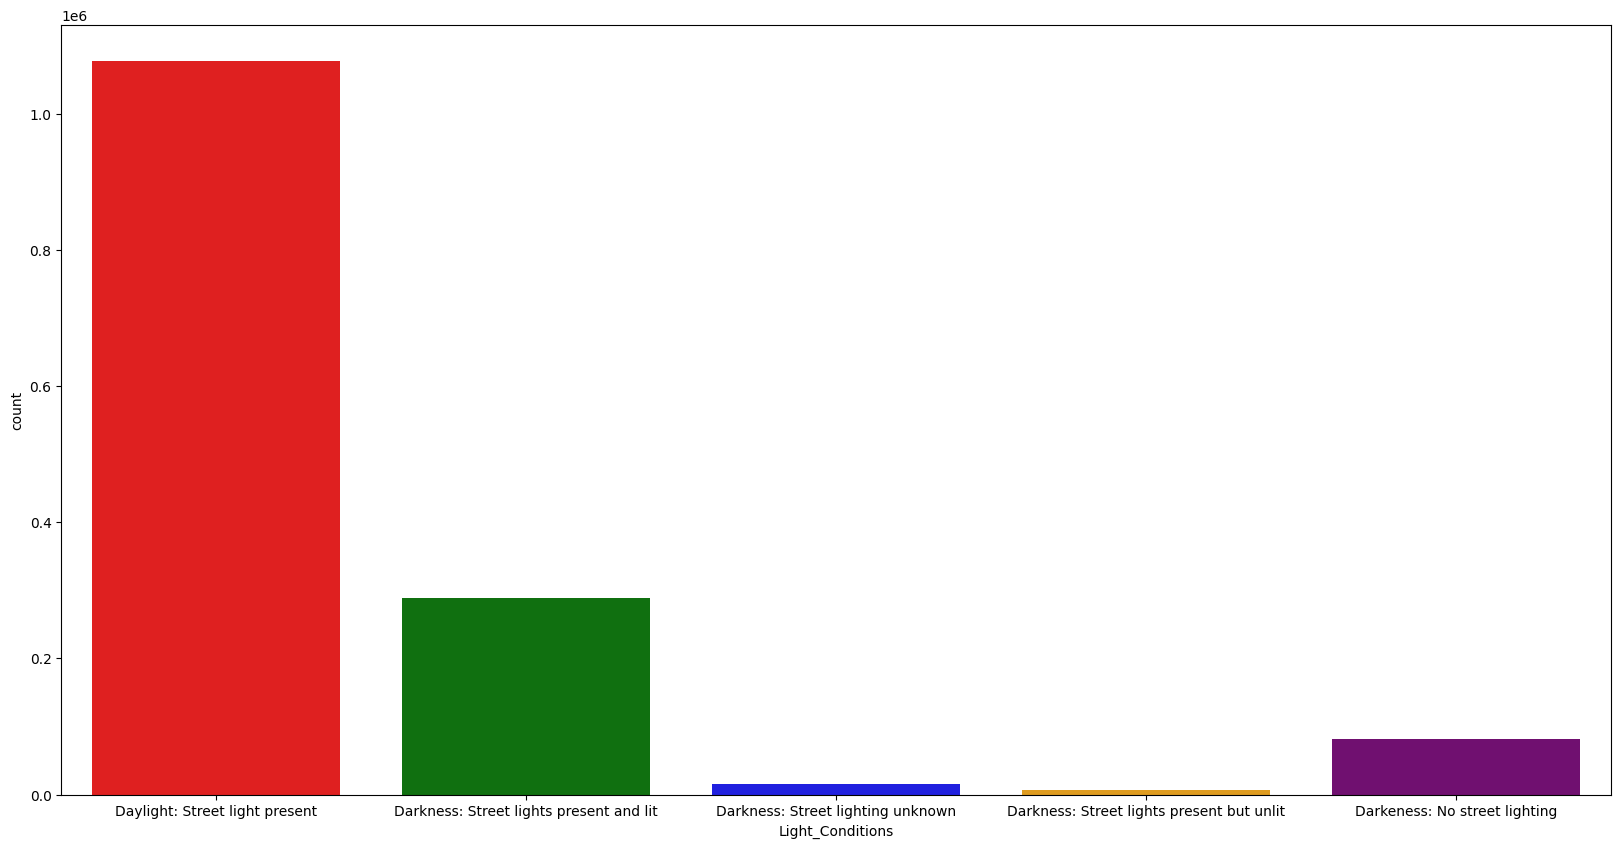

In [5]:
plt.figure(figsize=(20,10))
palette = ["r","g","b","orange","purple"]
sns.countplot(data,x="Light_Conditions", palette=palette)

## Weather Conditions

C:\Users\kdrer\AppData\Local\Temp\ipykernel_6756\277328558.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data,x="Weather_Conditions", palette=palette)
C:\Users\kdrer\AppData\Local\Temp\ipykernel_6756\277328558.py:3: UserWarning: 
The palette list has fewer values (5) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data,x="Weather_Conditions", palette=palette)


<Axes: xlabel='Weather_Conditions', ylabel='count'>

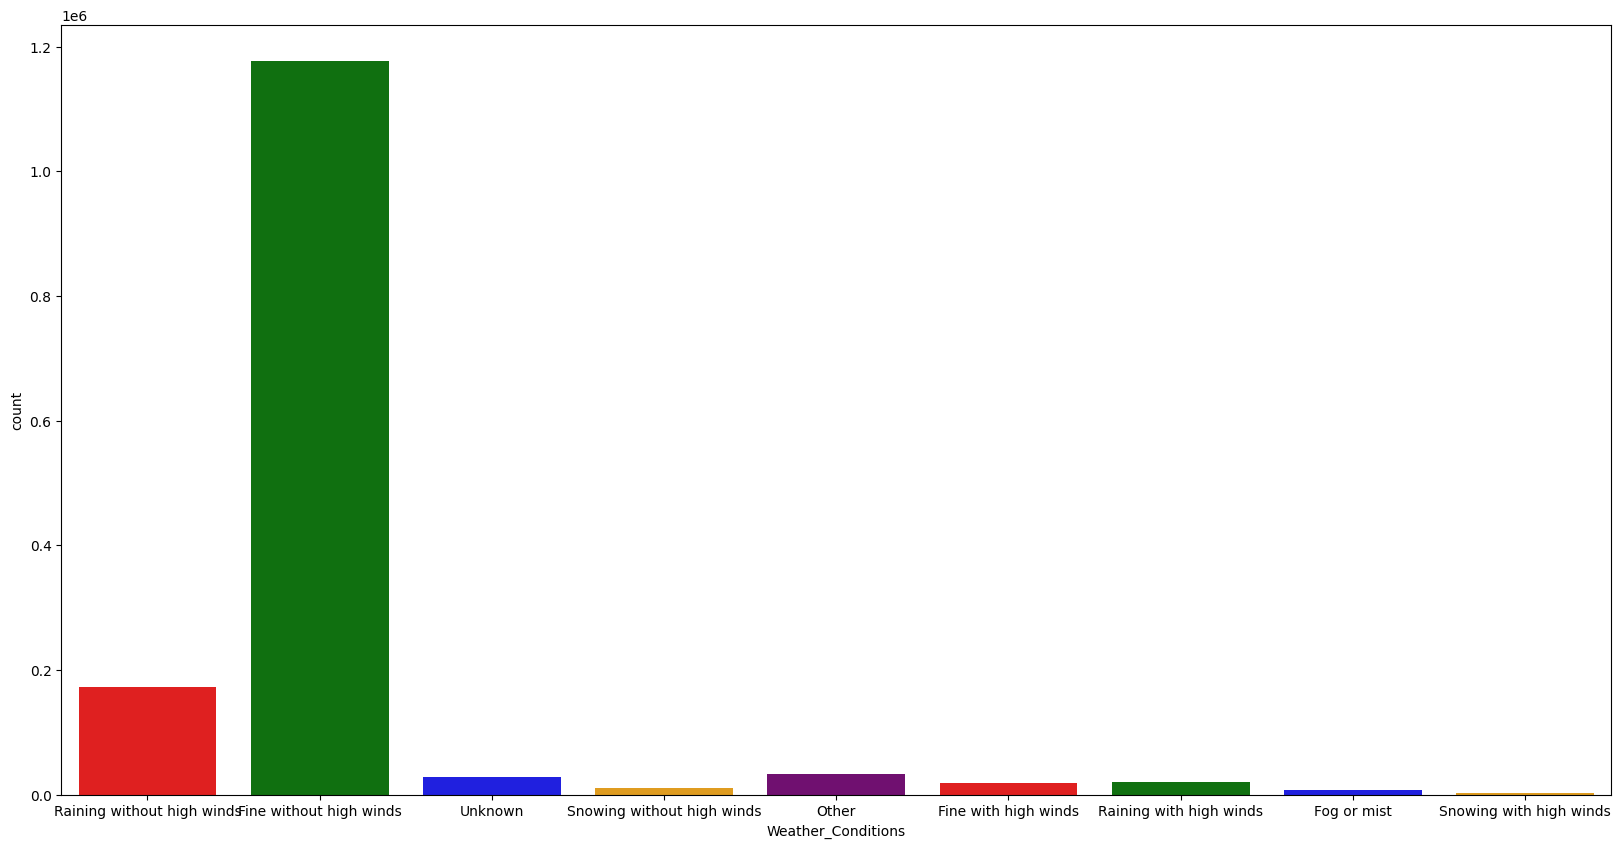

In [6]:
plt.figure(figsize=(20,10))
palette = ["r","g","b","orange","purple"]
sns.countplot(data,x="Weather_Conditions", palette=palette)

## NOT: hata var

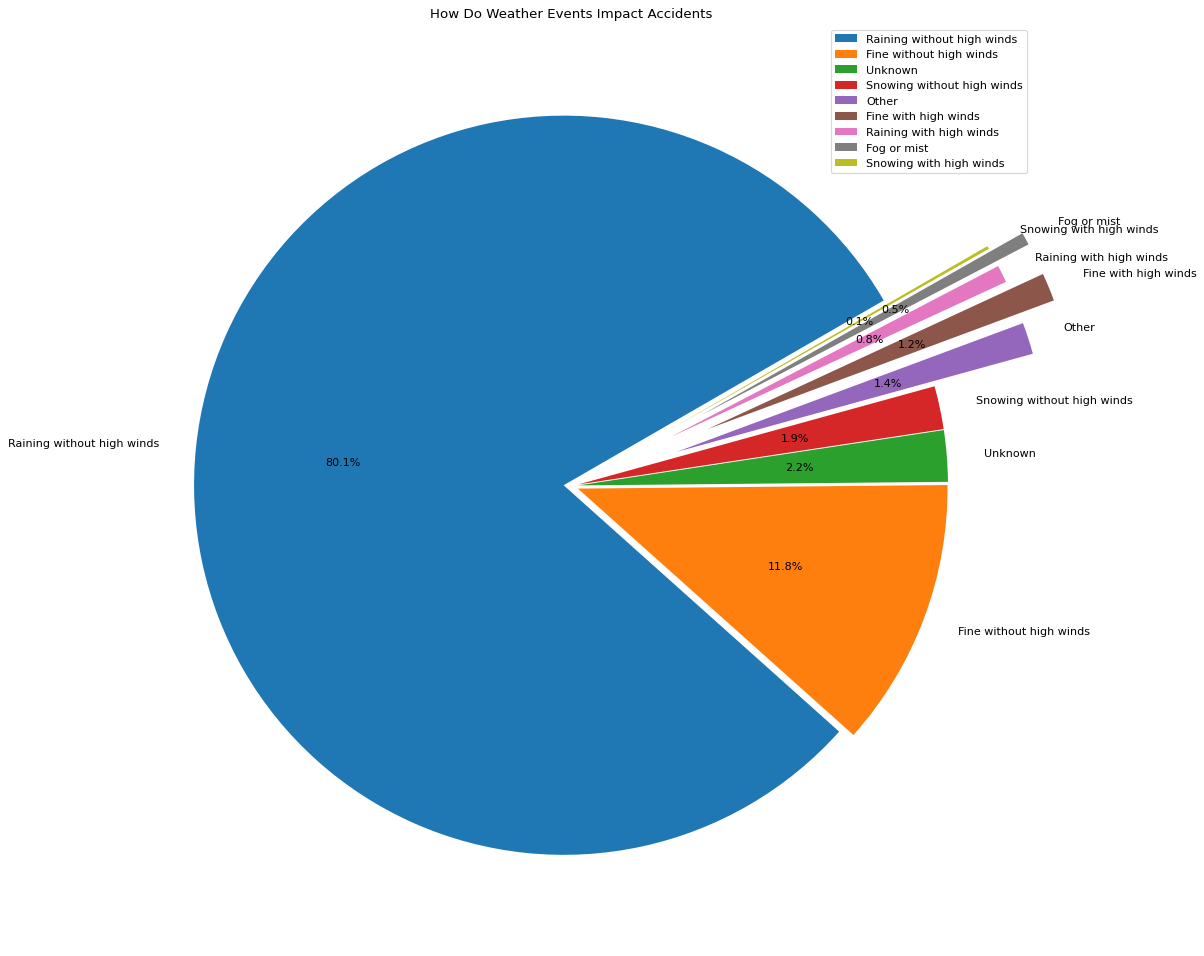

In [7]:
weather_cond = data["Weather_Conditions"].value_counts()
weather_cond_arr = data["Weather_Conditions"].unique()
weather_num_acc_arr = weather_cond.values

figure(figsize=(15, 15), dpi=80)
plt.pie(weather_num_acc_arr, labels = weather_cond_arr, colors = sns.color_palette(),startangle = 30,textprops={'size': 'medium'},explode=(0.02,0.02,0.02,0.02,0.3,0.4,0.3,0.4,0.3),autopct="%1.1f%%")
plt.legend()
plt.title("How Do Weather Events Impact Accidents")
plt.show()

In [8]:
weather_cond

Weather_Conditions
Fine without high winds       1176480
Raining without high winds     172915
Other                           32907
Unknown                         27729
Raining with high winds         20357
Fine with high winds            18097
Snowing without high winds      11140
Fog or mist                      8052
Snowing with high winds          1932
Name: count, dtype: int64

## Road Conditions

C:\Users\kdrer\AppData\Local\Temp\ipykernel_6756\3804398988.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data,x="Road_Surface_Conditions", palette=palette)
C:\Users\kdrer\AppData\Local\Temp\ipykernel_6756\3804398988.py:3: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data,x="Road_Surface_Conditions", palette=palette)


<Axes: xlabel='Road_Surface_Conditions', ylabel='count'>

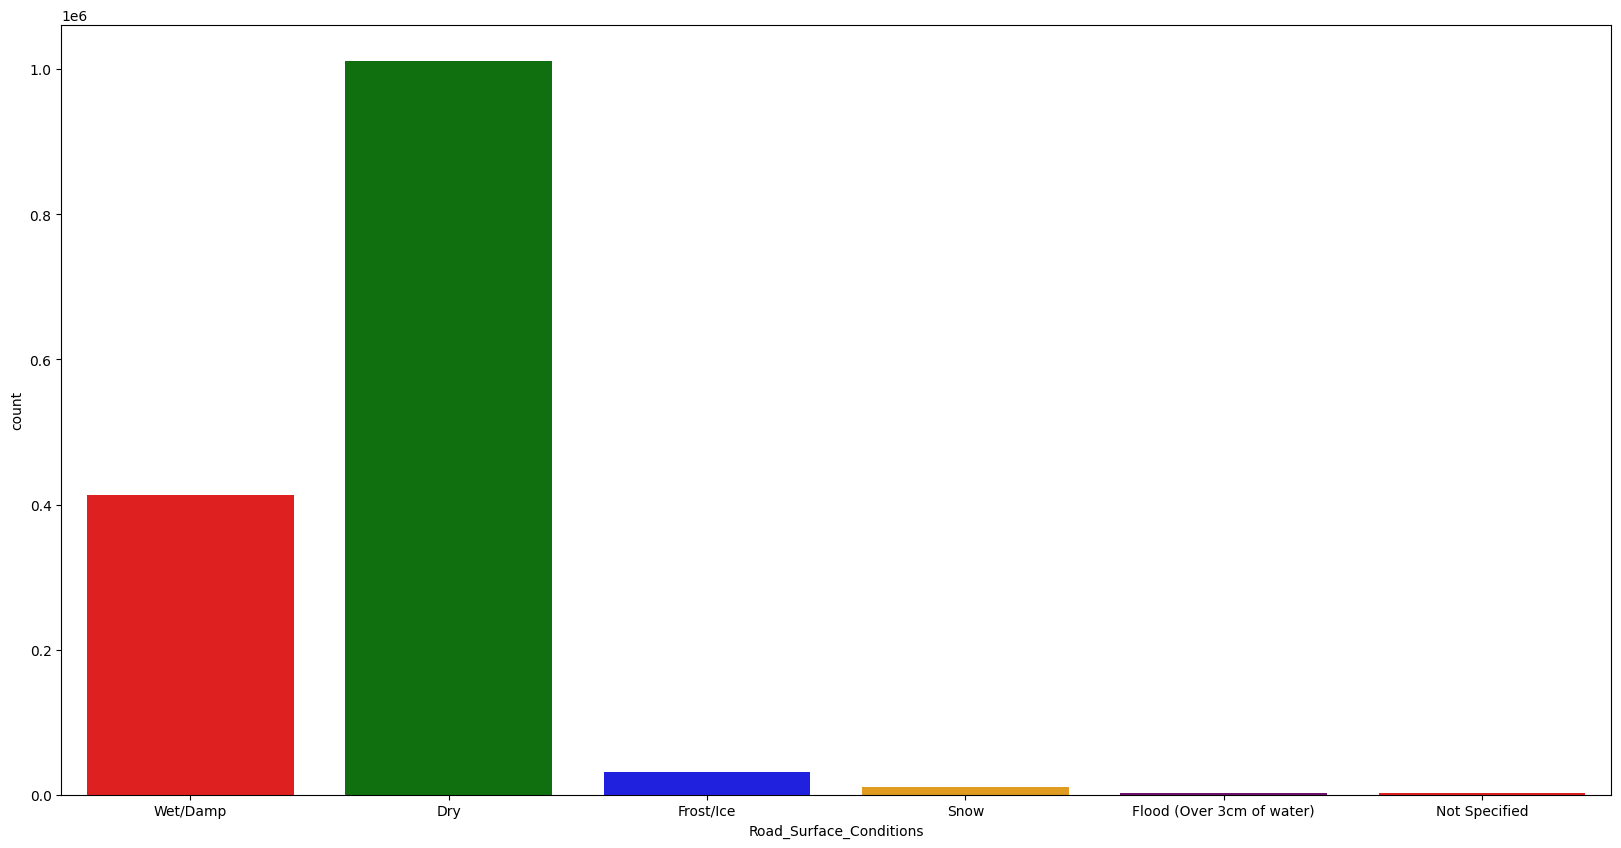

In [9]:
plt.figure(figsize=(20,10))
palette = ["r","g","b","orange","purple"]
sns.countplot(data,x="Road_Surface_Conditions", palette=palette)

## NOT: Hata var

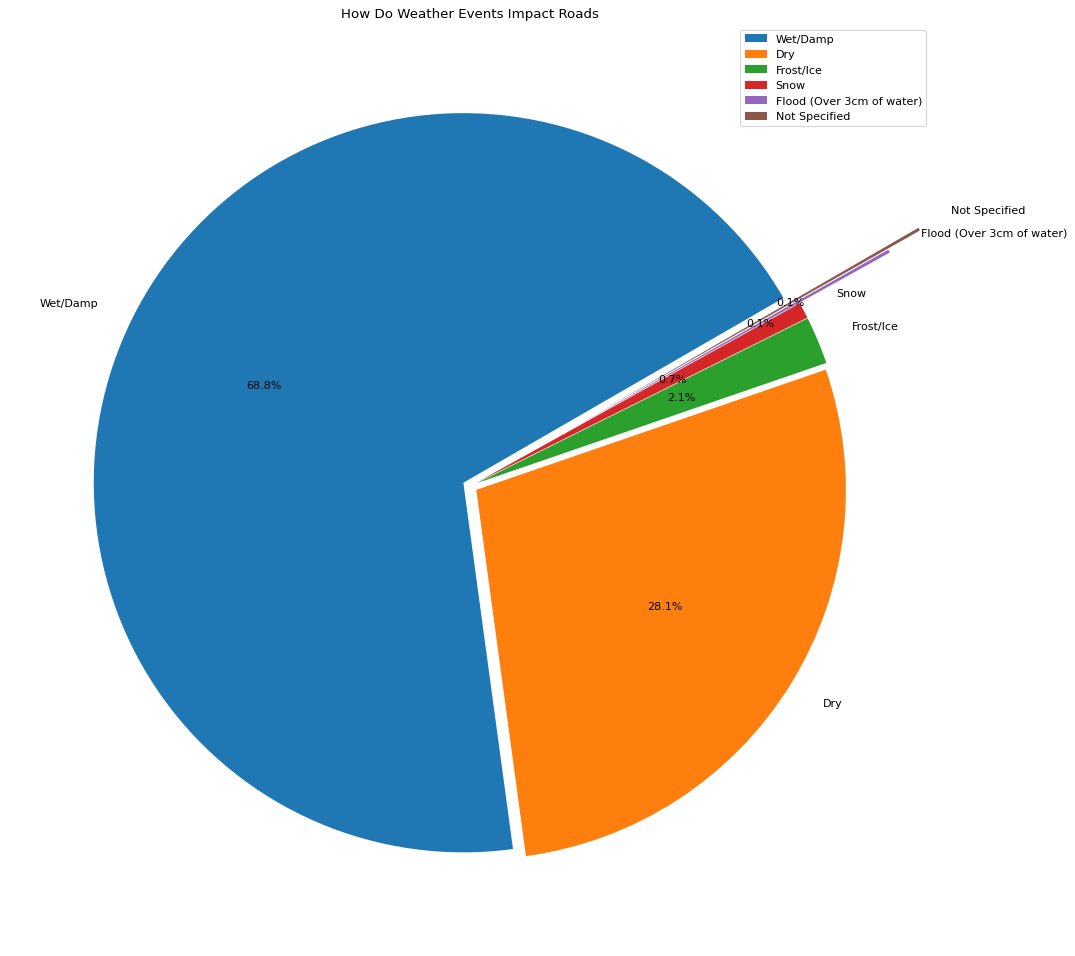

In [10]:
road_cond = data["Road_Surface_Conditions"].value_counts()
road_cond_arr = data["Road_Surface_Conditions"].unique()
road_num_acc_arr = road_cond.values

figure(figsize=(15, 15), dpi=80)
plt.pie(road_num_acc_arr, labels = road_cond_arr, colors = sns.color_palette(),startangle = 30,textprops={'size': 'medium'},explode=(0.02,0.02,0.02,0.02,0.3,0.4),autopct="%1.1f%%")
plt.legend()
plt.title("How Do Weather Events Impact Roads")
plt.show()

## Accidents Severity

C:\Users\kdrer\AppData\Local\Temp\ipykernel_6756\2284652358.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data,x="Accident_Severity", palette=palette)
C:\Users\kdrer\AppData\Local\Temp\ipykernel_6756\2284652358.py:3: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(data,x="Accident_Severity", palette=palette)


<Axes: xlabel='Accident_Severity', ylabel='count'>

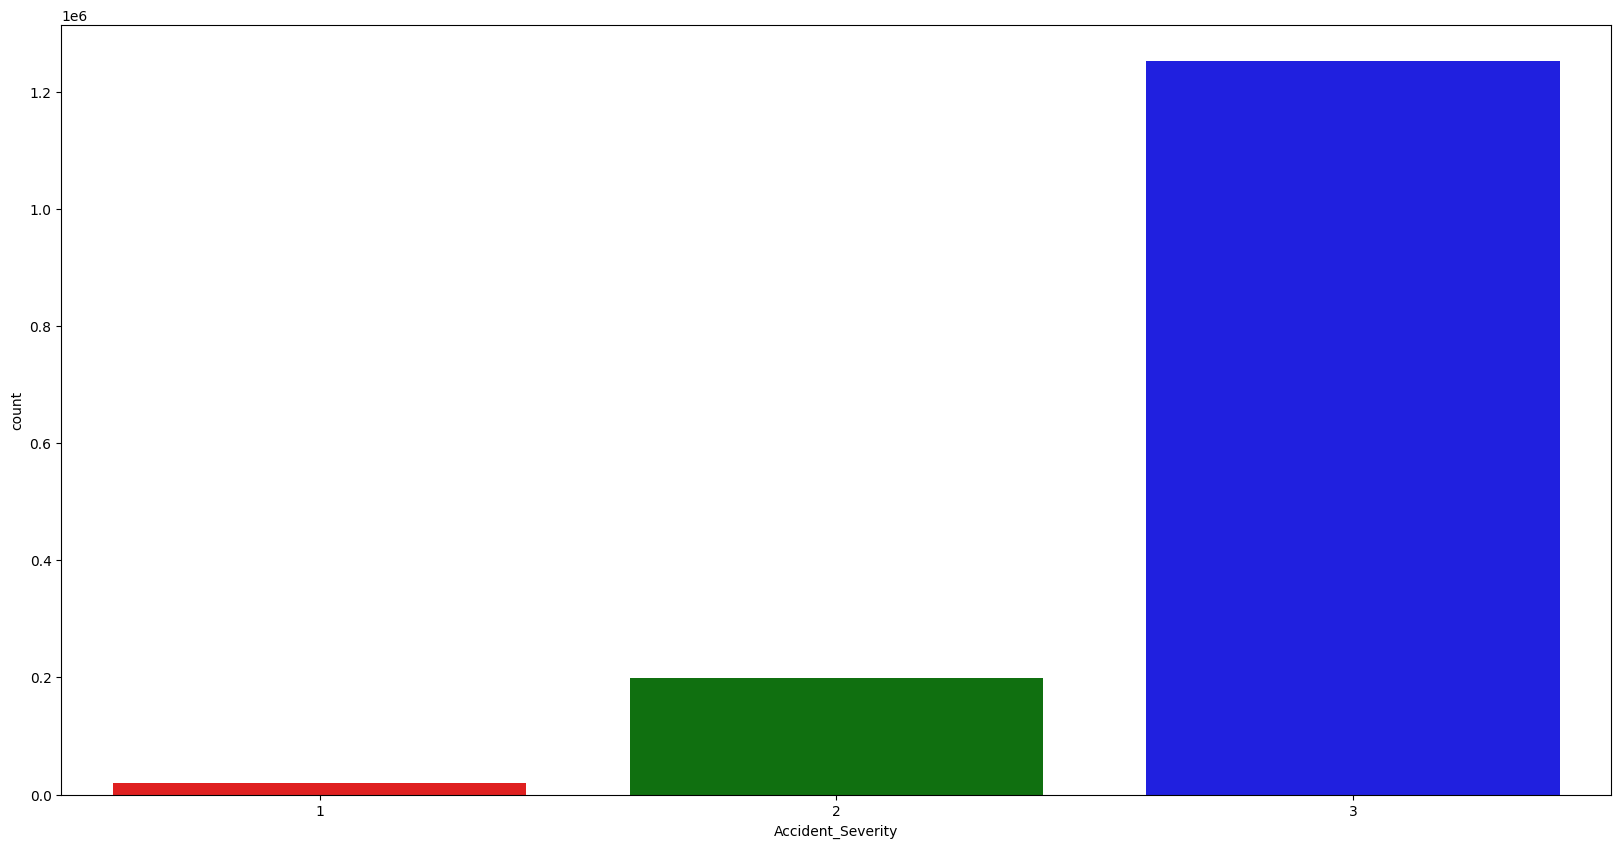

In [11]:
plt.figure(figsize=(20,10))
palette = ["r","g","b","orange","purple"]
sns.countplot(data,x="Accident_Severity", palette=palette)

## Accidents by year and weekdays

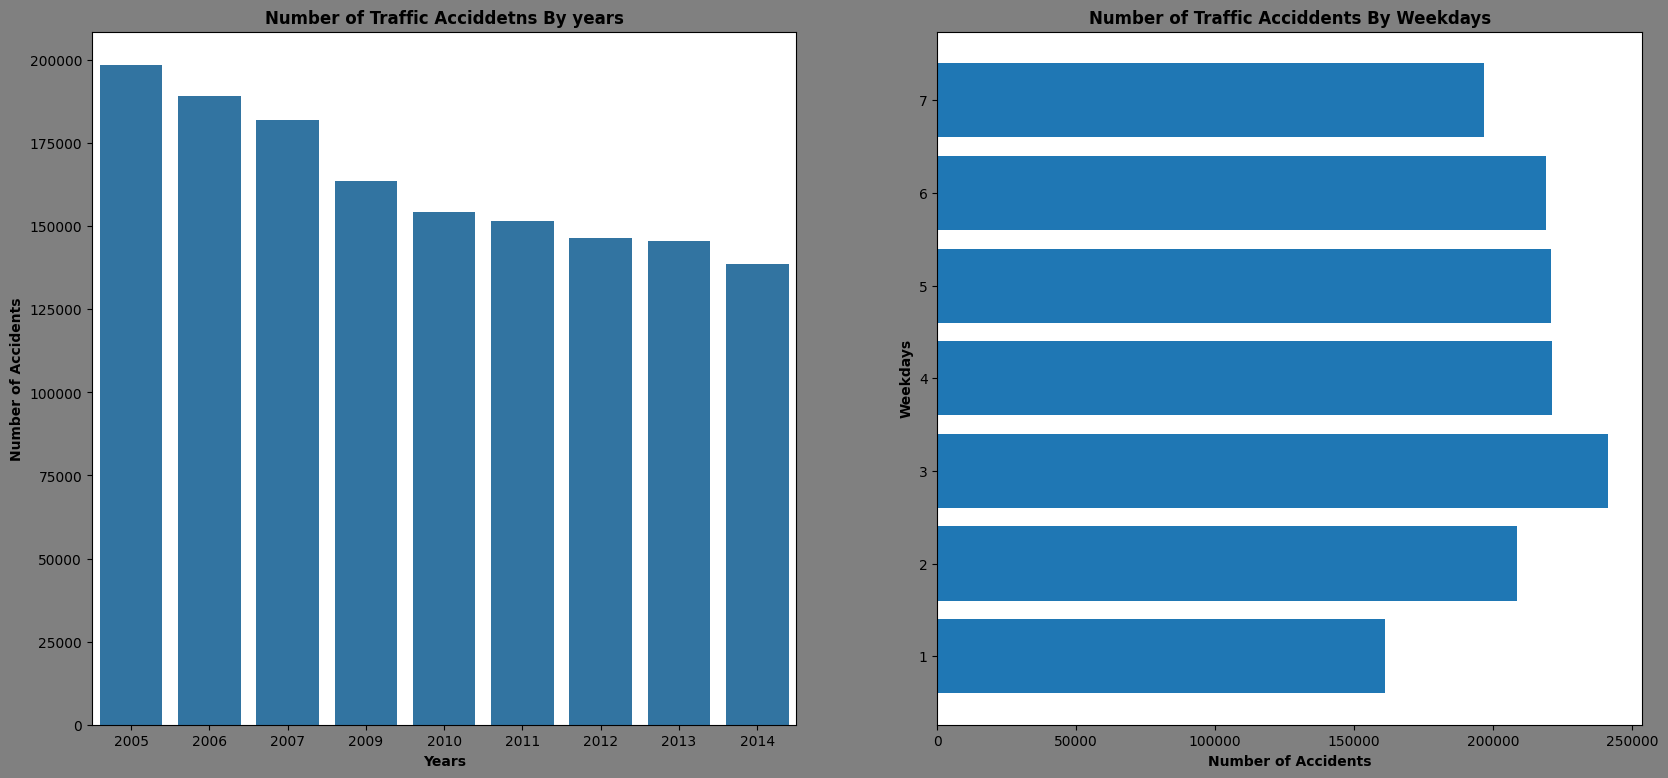

In [12]:
year = data["Year"].value_counts() 

years = data["Year"].unique()
num = year.values

week = data["Day_of_Week"].value_counts()
week
weeks = data["Day_of_Week"].unique()
num_w = week.values

plt.figure(figsize = (20,9),facecolor='grey')

plt.subplot(1, 2, 1)

sns.barplot(x = years, y = num)
plt.ylabel("Number of Accidents",weight="bold")
plt.xlabel("Years",weight="bold")

plt.title("Number of Traffic Acciddetns By years",weight="bold")

plt.subplot(1, 2, 2)

plt.barh(weeks,num_w)
plt.title("Number of Traffic Acciddents By Weekdays",weight="bold")
plt.xlabel("Number of Accidents",weight="bold")
plt.ylabel("Weekdays",weight="bold")
plt.show()